### measure drift parameters from the Long disk size measurements

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{xcolor}')

In [3]:
import astropy.constants as c
import astropy.units as u
au = c.au.cgs.value
mH = c.m_p.cgs.value
kB = c.k_B.cgs.value
msun = c.M_sun.cgs.value
G = c.G.cgs.value
mearth = c.M_earth.cgs.value

In [87]:
colnames = ['Source', 'dist', 'lambda', 'Rmm90', 'RCO90', 'Mdust', 'Lstar', 'Teff', 'Mstar', 'age', 'Ref']
df = pd.read_csv('/Users/calebpainter/Downloads/DECO/dust_drift/ALL_combined_table.txt', skiprows=2, header=0, sep='\s+', names=colnames)
deco_df = pd.read_csv('/Users/calebpainter/Downloads/DECO/code/Radial_profiles_df2.csv')
manara_table = pd.read_csv('/Users/calebpainter/Downloads/PP7-Surveys_2022-10-19_PPVII_website.tsv', sep='\t')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/91353868.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('/Users/calebpainter/Downloads/DECO/dust_drift/ALL_combined_table.txt', skiprows=2, header=0, sep='\s+', names=colnames)


In [88]:
full_dict = []

for line in range(len(deco_df)):
    disk_row = deco_df.iloc[line]
    name, region, distance, r_mm, r_co = disk_row['Name'], disk_row['Region'], disk_row['distance'], disk_row['r_dust_90_corr'], disk_row['r_co_90_corr']
    print(name, region, distance, r_mm, r_co)

    manara_row = manara_table[manara_table['Source']==name]


    Mdust, Lstar, Teff, Mstar = manara_row['Standardized_Mdust_Mearth'].values[0], manara_table['Lstar_xs'].values[0], manara_table['Teff_xs'].values[0], manara_table['Mstar_PPVII'].values[0]
    Mdust, Lstar, Teff, Mstar = float(Mdust), float(Lstar), float(Teff), float(Mstar)
    print(Mdust, Lstar, Teff, Mstar)

    age = 0
    if region == 'Lupus':
        age = 2
    if region == 'ROph':
        age = 1
    if region == 'ChamI':
        age = 2


    disk_row_dict = {
        'Source': name,
        'dist': distance,
        'lambda': 1.2,
        'Rmm90': r_mm,
        'RCO90': r_co,
        'Mdust': Mdust,
        'Lstar': Lstar,
        'Teff': Teff,
        'Mstar': Mstar,
        'age': age,
        'Ref': 'Manara',
        'ratio': r_co/r_mm
    }

    full_dict.append(disk_row_dict)
    
full_deco_df = pd.DataFrame.from_dict(full_dict)

full_deco_df.head()

J16083070-3828268 Lupus 158.0 122.37 329.28
29.08 0.89 4060.0 0.61
Sz65 Lupus 153.47 74.9 186.75
21.19 0.89 4060.0 0.61
MYLup Lupus 158.0 79.14 246.62
50.35 0.89 4060.0 0.61
Sz71 Lupus 155.2 96.56 236.05
50.06 0.89 4060.0 0.61
Sz118 Lupus 161.46 67.42 198.29
18.37 0.89 4060.0 0.61
Sz129 Lupus 160.13 64.14 126.36
58.49 0.89 4060.0 0.61
Sz98 Lupus 156.27 153.98 291.9
75.85 0.89 4060.0 0.61
Sz111 Lupus 158.37 125.78 439.44
45.44 0.89 4060.0 0.61
Sz130 Lupus 159.18 56.96 135.78
1.5 0.89 4060.0 0.61
J16124373-3815031 Lupus 159.85 38.95 112.56
9.04 0.89 4060.0 0.61
Sz68 Lupus 158.0 42.52 94.92
49.8 0.89 4060.0 0.61
J162739.4-243915 ROph 135.27 37.81 109.19
36.61 0.89 4060.0 0.61
J162854.1-244744 ROph 136.46 40.5 121.45
7.58 0.89 4060.0 0.61
J162618.9-242820 ROph 137.53 77.69 234.41
54.86 0.89 4060.0 0.61
J162645.0-242308 ROph 110.07 186.36 488.89
113.81 0.89 4060.0 0.61
J162823.3-242241 ROph 146.81 72.58 278.44
10.99 0.89 4060.0 0.61
J162556.1-242048 ROph 134.76 19.01 65.69
38.45 0.89 4060.0

,Source,dist,lambda,Rmm90,RCO90,Mdust,Lstar,Teff,Mstar,age,Ref,ratio
0,J16083070-3828268,158.00,1.2,122.37,329.28,29.08,0.89,4060.0,0.61,2,Manara,2.690856
1,Sz65,153.47,1.2,74.90,186.75,21.19,0.89,4060.0,0.61,2,Manara,2.493324
2,MYLup,158.00,1.2,79.14,246.62,50.35,0.89,4060.0,0.61,2,Manara,3.116250
3,Sz71,155.20,1.2,96.56,236.05,50.06,0.89,4060.0,0.61,2,Manara,2.444594
4,Sz118,161.46,1.2,67.42,198.29,18.37,0.89,4060.0,0.61,2,Manara,2.941115


In [89]:
full_deco_df

,Source,dist,lambda,Rmm90,RCO90,Mdust,Lstar,Teff,Mstar,age,Ref,ratio
0,J16083070-3828268,158.00,1.2,122.37,329.28,29.08,0.89,4060.0,0.61,2,Manara,2.690856
1,Sz65,153.47,1.2,74.90,186.75,21.19,0.89,4060.0,0.61,2,Manara,2.493324
2,MYLup,158.00,1.2,79.14,246.62,50.35,0.89,4060.0,0.61,2,Manara,3.116250
3,Sz71,155.20,1.2,96.56,236.05,50.06,0.89,4060.0,0.61,2,Manara,2.444594
4,Sz118,161.46,1.2,67.42,198.29,18.37,0.89,4060.0,0.61,2,Manara,2.941115
5,Sz129,160.13,1.2,64.14,126.36,58.49,0.89,4060.0,0.61,2,Manara,1.970065
6,Sz98,156.27,1.2,153.98,291.90,75.85,0.89,4060.0,0.61,2,Manara,1.895701
7,Sz111,158.37,1.2,125.78,439.44,45.44,0.89,4060.0,0.61,2,Manara,3.493719
8,Sz130,159.18,1.2,56.96,135.78,1.50,0.89,4060.0,0.61,2,Manara,2.383778
9,J16124373-3815031,159.85,1.2,38.95,112.56,9.04,0.89,4060.0,0.61,2,Manara,2.889859


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/3832844479.py:3: RuntimeWarning: divide by zero encountered in divide
  return sigma0 / (r/rc) / np.exp(r/rc)


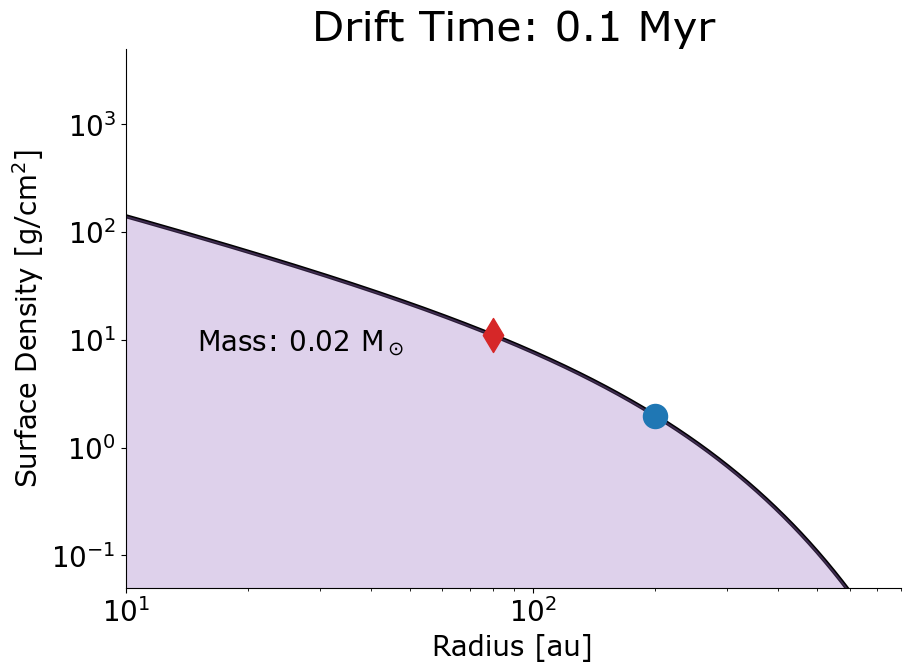

In [242]:
csfont = {'fontname':'Verdana', 'fontsize':20}

fig, ax = plt.subplots(figsize=(10,7))

r = np.arange(0,600, 1)
sigma = sigma1(r, 300,55)
sigma = sigma1(r, 10,150)


ax.plot(r,sigma, zorder=1, linewidth=3, color='black')
ax.scatter(r[80],sigma[80], color='tab:red',zorder=2, s=300, marker='d',label='Dust Radius')
ax.scatter(r[200],sigma[200], color='tab:blue',zorder=2, s=300,label='CO Radius')

ax.fill_between(r,sigma, 0, color='tab:purple', alpha=.3)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(5*10**-2, 5*10**3)
ax.set_xlim(10,800)
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)
ax.tick_params(labelsize=20)

ax.set_xlabel("Radius [au]", **csfont)
ax.set_ylabel(r"Surface Density [g/cm$^2$]", **csfont)
ax.spines[['right', 'top']].set_visible(False)
ax.text(15, 8, r'Mass: $0.02$ M$_\odot$', **csfont)
# plt.legend(fontsize=20)
# ax.grid(which='both')
plt.title("Drift Time: 0.1 Myr", fontname='Verdana', fontsize=30)
plt.savefig('/Users/calebpainter/Desktop/pres_figs/surfance10')
plt.show()

In [33]:
# Lynden-Bell & Pringle surface density profile for gamma=1
def sigma1(r, sigma0, rc):
    return sigma0 / (r/rc) / np.exp(r/rc)

def logsigma1(r, sigma0, rc):
    return np.log10(sigma0 / (r/rc) / np.exp(r/rc))

In [34]:
# Powell prescription for the surface density at 1 Myr; all variables in cgs
def powell(v0, rho_s, s, r):
    Myr2seconds = 3.15e13
    Sigma_dust = 2.5 * Myr2seconds * v0 * rho_s * s / r
    return Sigma_dust

In [35]:
# Trapman prescription for the surface density in g/cm2 at the 90% CO radius for a disk with gas+dust mass M
def trapman(M, L):
    logL = np.log10(L)
    #Sigma_CO = 0.0143 * M**0.34
    Sigma_CO = 10**(-2.15-0.53*logL) * M**(0.30-0.08*logL)
    return Sigma_CO

In [36]:
def fitsigma1(R, Sigma):
    # solve equation for gamma=1
    Rc = (R[0]-R[1]) / np.log(Sigma[1]*R[1] / (Sigma[0]*R[0]))
    Sigma0 = Sigma[0] * (R[0] / Rc) * np.exp(R[0]/Rc)
    return Sigma0, Rc

In [37]:
def match_mass(t, R, Sigma, Mdust):
    Sigma_drift = Sigma.copy()
    Sigma_drift[0] *= t
    Sigma0, Rc = fitsigma1(R, Sigma_drift)

    x = np.logspace(0, 3, num=30)
    M = 3.747e-4 * np.trapz(2*np.pi*x*sigma1(x, Sigma0, Rc), x)    # earth masses of dust (for g/d=100)

    return M-Mdust

In [38]:
def toomre(t, R, Sigma, Mstar, Lstar):
    Sigma_drift = Sigma.copy()
    Sigma_drift[0] *= t
    Sigma0, Rc = fitsigma1(R, Sigma_drift)

    x = np.logspace(0, 3, num=30)
    T0 = 82 * (Lstar/0.28)**(2/7) / (Mstar/0.8)**(1/7) 
    T = T0 * x**(-3/7)
    c_s = 5952 * np.sqrt(T)
    Omega = 1.99e-7 * np.sqrt(Mstar / x**3)
    Q = 4.77e6 * c_s * Omega / sigma1(x, Sigma0, Rc)
    Qmin = np.min(Q)

    return Qmin-1

In [265]:
def mq(R, Sigma0, Rc, Mstar, Lstar):
    # calculate the total mass and Toomre Q profile over R in au
    Sigma_fit = sigma1(R, Sigma0, Rc)

    # integrate Sigma to get total mass
    M = 1.125e-7 * np.trapz(Sigma_fit*2*np.pi*R, R)    # solar masses

    T0 = 82 * (Lstar/0.28)**(2/7) / (Mstar/0.8)**(1/7) 
    T = T0 * R**(-3/7)
    c_s = 5952 * np.sqrt(T)
    Omega = 1.99e-7 * np.sqrt(Mstar / R**3)
    Q = 4.77e6 * c_s * Omega / Sigma_fit

    max_sigma = 4.77e6 * c_s * Omega

    return M, Q, max_sigma

In [40]:
def get_data_points(df, iloc):
    Mstar = df['Mstar'][iloc]                           # Msun
    Lstar = df['Lstar'][iloc]                           # Lsun
    T0 = 82 * (Lstar/0.28)**(2/7) / (Mstar/0.8)**(1/7)  # midplane temperature at 1au Powell 2017 equation 2
    #print(T0)
    rho_s = 2.0                                         # g/cm^3
    s = df['lambda'][iloc] / (20*np.pi)                 # grain size in cm

    # dust and CO radii in au
    R_obs = np.array([df['Rmm90'][iloc], df['RCO90'][iloc]])

    # drift speed in cm/s
    T = T0 * (R_obs[0])**(-3/7)
    c_s = np.sqrt(kB * T / (2.33 * mH))
    v_k = np.sqrt(G * Mstar * msun / (R_obs[0] * au))
    v0 = c_s**2 / (2 * v_k)
    print(f'Drift speed = {v0/1e5:5.3f} km/s')

    # dust mass assuming Tdust=20K, in earth masses
    # disk mass for gas/dust=100, in solar masses
    Mdust = df['Mdust'][iloc]
    Mdisk = 100 * Mdust * mearth/msun
    print(f'Dust mass ={Mdust:6.2f} earth masses, total disk mass ={Mdisk:6.4f} solar masses')

    # surface density for dust at 1 Myr and CO at given Mdisk
    Sigma = np.array([powell(v0, rho_s, s, R_obs[0]*au), trapman(Mdisk, Lstar)])

    return(R_obs, Sigma, Mdust)

In [290]:
def fit_data(df, iloc, t_start, m_start, plot_to_screen=True, panelplot=False, ax=None):
    source = df['Source'][iloc]
    print(f'Source: {source}')
    Mstar = df['Mstar'][iloc]
    Lstar = df['Lstar'][iloc]
    tstar = df['age'][iloc]
    R_obs, Sigma, Mdust = get_data_points(df, iloc)

    if plot_to_screen:
        plt.ion()
    else:
        plt.ioff()

    if panelplot:
        fontsize = 15
    else:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111)
        fontsize = 16

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(20, 500)
    ax.set_ylim(1e-4, 1e3)

    # ax2 = ax.twinx()
    # ax2.set_yscale('log')
    # ax2.set_ylim(0.1, 100)
    # ax2.plot([0, 1e3], [1, 1], ':', lw=3, alpha=0.5, color='black')

    if not panelplot:
        ax.set_xlabel('r (au)', fontsize=fontsize)
        ax.set_ylabel(r'$\Sigma_{\rm gas}$ (g cm$^{-2}$)', fontsize=fontsize)
        # ax2.set_ylabel('Toomre Q', fontsize=fontsize)
        #ax.grid(which='both', alpha=0.3, ls='--') 

    # make main axis visible above second without hiding it
    ax.set_zorder(1)
    ax.patch.set_visible(False)

    R_plot = np.logspace(0, 3, num=100)
    M_fit = []
    max_iter = 10

    # initial guesses for drif time and max stable disk mass
    t0 = 1.0
    mdisk0 = 0.1

    if t_start != None:
        t0 = t_start,
        mdisk0 = m_start
    # some disks need different starting conditions to converge
    if source in ['DoAr25', 'FPTau']:
        t0 = 0.1
        mdisk0 = 0.01
    if source in ['IQTau', 'Sz129', 'Sz71', 'Sz98']:
        t0 = 0.5
        mdisk0 = 0.2
    if source == 'HD143006':
        t0 = 1
        mdisk0 = 0.3
    if source == 'J04202555+2700355':
        t0 = 0.01
        mdisk0 = 0.01
    if source in ['J162623.6-242439','Sz130','J11104959-7717517','J11173700-7704381','J11105333-7634319']:
        t0 = 0.1
        mdisk0 = 0.1
    if source == 'TWHya':
        t0 = 2
        mdisk0 = 0.2
    if source == 'J10590108-7722407':
        t0 = .05
        mdisk0 = 0.2

    # solve for the two extreme cases
    for i in range(2):
        if i == 0:
            # disk mass = 100 * dust mass
            label = 'Case 1'
            color = 'tab:blue'
            #label = str(f"100M_dust = {100*Mdust*mearth/msun:6.3f}")
            #label = str(f"$M = {100*Mdust*mearth/msun:6.3f} M_\odot$")
            t_drift = fsolve(match_mass, t0, args=(R_obs, Sigma, Mdust))[0]
            td0 = t_drift
        if i == 1:
            # disk is marginally gravitationally stable
            color = 'tab:red'
            label = 'Case 2'
            iter = 0
            mdisk_converge = False
            while iter < max_iter and not mdisk_converge:
                Sigma_iter = Sigma.copy()
                Sigma_iter[1] = trapman(mdisk0, Lstar)
                t_drift = fsolve(toomre, t0, args=(R_obs, Sigma_iter, Mstar, Lstar))[0]
                Sigma_iter[0] *= t_drift
                Sigma0, Rc = fitsigma1(R_obs, Sigma_iter)
                Sigma_fit = sigma1(R_plot, Sigma0, Rc)
                mdisk1 = 1.125e-7 * np.trapz(Sigma_fit*2*np.pi*R_plot, R_plot)
                print(f'Trapman iteration {iter}: t_drift={t_drift:6.3f}   Mass change {mdisk0:6.3f} --> {mdisk1:6.3f}')
                if np.abs(mdisk1/mdisk0-1) <  0.99:
                    mdisk_converge = True
                mdisk0 = mdisk1
                iter += 1
            #label = str(f"M(Q=1) = {mdisk0:6.3f}")
            #label = str(f"$M = {mdisk0:6.3f} M_\odot$")
        Sigma_drift = Sigma.copy()
        Sigma_drift[0] *= t_drift
        td1 = t_drift
        if i==1:
            Sigma_drift[1] = trapman(mdisk0, Lstar)

        ax.scatter(R_obs[0], Sigma_drift[0], color=color, label=label, marker='d',s=100)
        ax.scatter(R_obs[1], Sigma_drift[1], color=color, label=label,s=100)

        Sigma0, Rc = fitsigma1(R_obs, Sigma_drift)
        M, Q, max_sigma = mq(R_plot, Sigma0, Rc, Mstar, Lstar)
        M_fit.append(M)

        Sigma_plot = sigma1(R_plot, Sigma0, Rc)
        tau1 = Sigma_plot > 50
        ax.plot(R_plot, Sigma_plot, '-', color=color, lw=2)
        ax.plot(R_plot[tau1], Sigma_plot[tau1], '-', color=color, lw=2)
        ax.plot(R_plot, max_sigma, '-', color='black', lw=2, ls='--')

        # ax2.plot(R_plot, Q, '--', color=color, zorder=0)
        ax.legend(fontsize=fontsize-6)

        print(f'tdrift ={t_drift:6.3f} Myr, M = {M:6.4f} solar masses, Qmin = {np.min(Q):5.2f}')

    # rect = patches.Rectangle((0.02, 0.02), 0.26, 0.22, edgecolor='None', facecolor='white', alpha=0.8, transform=ax.transAxes, zorder=2)
    # ax.add_patch(rect)
    # ax.text(0.03, 0.17, source, fontsize=fontsize, ha='left', transform=ax.transAxes, zorder=3)
    # ax.text(0.03, 0.125, f'Stellar age = {tstar:4.1f} Myr', fontsize=fontsize-4, ha='left', transform=ax.transAxes, zorder=3)
    # #ax.text(0.03, 0.04, f'Drift times = {td0:3.1f}-{td1:3.1f} Myr', fontsize=fontsize-4, ha='left', transform=ax.transAxes, zorder=3)

    # M1str = str(f"{100*Mdust*mearth/msun:6.3f}")
    # t1str = str(f"{td0:4.1f}")
    # #ax.text(0.03, 0.08, "Case 1: $M=100M_{dust}=$"+M1str+"$M_\odot, t_{drift}=$"+t1str+" Myr", color='blue', fontsize=fontsize-5, ha='left', transform=ax.transAxes, zorder=3)
    # ax.text(0.03, 0.08, "Case 1: $M=$"+M1str+"$M_\odot, t_{drift}=$"+t1str+" Myr", color='blue', fontsize=fontsize-5, ha='left', transform=ax.transAxes, zorder=3)
    # M2str = str(f"{mdisk0:6.3f}")
    # t2str = str(f"{td1:4.1f}")
    # #ax.text(0.03, 0.04, "Case 2: $M(Q_{min}=1)=$"+M2str+"$M_\odot, t_{drift}=$"+t2str+" Myr", color='red', fontsize=fontsize-5, ha='left', transform=ax.transAxes, zorder=3)
    # ax.text(0.03, 0.04, "Case 2: $M=$"+M2str+"$M_\odot, t_{drift}=$"+t2str+" Myr", color='red', fontsize=fontsize-5, ha='left', transform=ax.transAxes, zorder=3)

    if not panelplot:
        fig.tight_layout()
        fig.savefig('disk_pdfs/'+source+'.pdf')

    if not plot_to_screen:
        plt.close()

    return td0, td1, *M_fit

Source: Sz118
Drift speed = 0.012 km/s
Dust mass = 18.37 earth masses, total disk mass =0.0055 solar masses
tdrift = 0.111 Myr, M = 0.0055 solar masses, Qmin = 40.95
Trapman iteration 0: t_drift= 2.201   Mass change  0.200 -->  0.200
tdrift = 2.201 Myr, M = 0.1997 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t
/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/3832729025.py:123: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(R_plot, max_sigma, '-', color='black', lw=2, ls='--')


(0.11087005293030389,
 2.20111371426527,
 0.005466399065280759,
 0.19973067961679664)

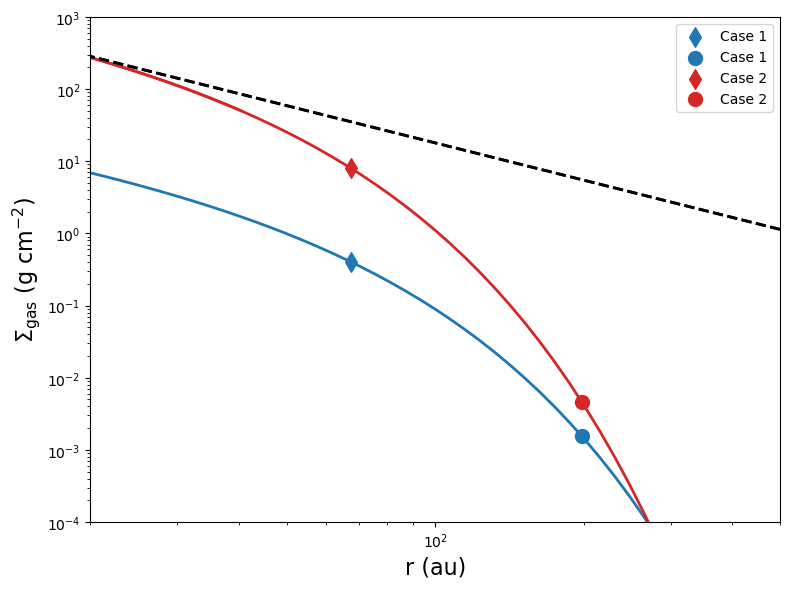

In [291]:
t_start, m_start = .05,.2
fit_data(full_deco_df, 4, t_start, m_start, plot_to_screen=True)

In [90]:
# DO ALL SOURCES!
f = open('drift_fit_results.txt', 'w')
f.write("#Source             Age  Drift_min Drift_max  M_min   M_max\n")
f.write("#-----------------------------------------------------------\n")
for i in range(len(full_deco_df)):
    td_min, td_max, M_min, M_max = fit_data(full_deco_df, i, None, None, plot_to_screen=False)
    f.write(f"{full_deco_df['Source'][i]:17s} {(full_deco_df['age'][i]):4.1f}  {td_min:6.3f}     {td_max:6.3f}  {M_min:7.4f} {M_max:7.4f}\n")
f.close()

Source: J16083070-3828268
Drift speed = 0.013 km/s
Dust mass = 29.08 earth masses, total disk mass =0.0087 solar masses
tdrift = 0.096 Myr, M = 0.0087 solar masses, Qmin = 31.67
Trapman iteration 0: t_drift= 1.335   Mass change  0.100 -->  0.243
Trapman iteration 1: t_drift= 1.453   Mass change  0.243 -->  0.246
tdrift = 1.453 Myr, M = 0.2453 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: Sz65
Drift speed = 0.012 km/s
Dust mass = 21.19 earth masses, total disk mass =0.0064 solar masses
tdrift = 0.084 Myr, M = 0.0064 solar masses, Qmin = 34.47
Trapman iteration 0: t_drift= 1.130   Mass change  0.100 -->  0.195
tdrift = 1.130 Myr, M = 0.1765 solar masses, Qmin =  1.12


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: MYLup
Drift speed = 0.012 km/s
Dust mass = 50.35 earth masses, total disk mass =0.0151 solar masses
tdrift = 0.259 Myr, M = 0.0151 solar masses, Qmin = 15.86
Trapman iteration 0: t_drift= 2.339   Mass change  0.100 -->  0.218
Trapman iteration 1: t_drift= 2.493   Mass change  0.218 -->  0.220
tdrift = 2.493 Myr, M = 0.2198 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: Sz71
Drift speed = 0.013 km/s
Dust mass = 50.06 earth masses, total disk mass =0.0150 solar masses
tdrift = 0.138 Myr, M = 0.0150 solar masses, Qmin = 15.61
Trapman iteration 0: t_drift= 1.082   Mass change  0.200 -->  0.216
tdrift = 1.082 Myr, M = 0.2131 solar masses, Qmin =  1.01


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: Sz118
Drift speed = 0.012 km/s
Dust mass = 18.37 earth masses, total disk mass =0.0055 solar masses
tdrift = 0.111 Myr, M = 0.0055 solar masses, Qmin = 40.99
Trapman iteration 0: t_drift= 2.070   Mass change  0.100 -->  0.200
Trapman iteration 1: t_drift= 2.201   Mass change  0.200 -->  0.202
tdrift = 2.201 Myr, M = 0.2013 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: Sz129
Drift speed = 0.012 km/s
Dust mass = 58.49 earth masses, total disk mass =0.0176 solar masses
tdrift = 0.086 Myr, M = 0.0176 solar masses, Qmin = 10.15
Trapman iteration 0: t_drift= 0.419   Mass change  0.200 -->  0.167
tdrift = 0.419 Myr, M = 0.1747 solar masses, Qmin =  0.95


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: Sz98
Drift speed = 0.013 km/s
Dust mass = 75.85 earth masses, total disk mass =0.0228 solar masses
tdrift = 0.074 Myr, M = 0.0228 solar masses, Qmin = 11.09
Trapman iteration 0: t_drift= 0.355   Mass change  0.200 -->  0.234
tdrift = 0.355 Myr, M = 0.2245 solar masses, Qmin =  1.05


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: Sz111
Drift speed = 0.013 km/s
Dust mass = 45.44 earth masses, total disk mass =0.0136 solar masses
tdrift = 0.193 Myr, M = 0.0136 solar masses, Qmin = 22.41
Trapman iteration 0: t_drift= 2.598   Mass change  0.100 -->  0.271
Trapman iteration 1: t_drift= 2.780   Mass change  0.271 -->  0.275
tdrift = 2.780 Myr, M = 0.2744 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: Sz130
Drift speed = 0.012 km/s
Dust mass =  1.50 earth masses, total disk mass =0.0005 solar masses
tdrift = 0.011 Myr, M = 0.0005 solar masses, Qmin = 471.50
Trapman iteration 0: t_drift= 0.981   Mass change  0.100 -->  0.171
tdrift = 0.981 Myr, M = 0.1566 solar masses, Qmin =  1.11


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J16124373-3815031
Drift speed = 0.012 km/s
Dust mass =  9.04 earth masses, total disk mass =0.0027 solar masses
tdrift = 0.084 Myr, M = 0.0027 solar masses, Qmin = 66.40
Trapman iteration 0: t_drift= 2.280   Mass change  0.100 -->  0.158
tdrift = 2.280 Myr, M = 0.1499 solar masses, Qmin =  1.06


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: Sz68
Drift speed = 0.012 km/s
Dust mass = 49.80 earth masses, total disk mass =0.0150 solar masses
tdrift = 0.146 Myr, M = 0.0150 solar masses, Qmin = 10.50
Trapman iteration 0: t_drift= 0.745   Mass change  0.100 -->  0.146
tdrift = 0.745 Myr, M = 0.1360 solar masses, Qmin =  1.08


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J162739.4-243915
Drift speed = 0.012 km/s
Dust mass = 36.61 earth masses, total disk mass =0.0110 solar masses
tdrift = 0.273 Myr, M = 0.0110 solar masses, Qmin = 15.40
Trapman iteration 0: t_drift= 2.290   Mass change  0.100 -->  0.156
tdrift = 2.290 Myr, M = 0.1479 solar masses, Qmin =  1.06


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J162854.1-244744
Drift speed = 0.012 km/s
Dust mass =  7.58 earth masses, total disk mass =0.0023 solar masses
tdrift = 0.076 Myr, M = 0.0023 solar masses, Qmin = 82.85
Trapman iteration 0: t_drift= 2.562   Mass change  0.100 -->  0.163
tdrift = 2.562 Myr, M = 0.1549 solar masses, Qmin =  1.06


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J162618.9-242820
Drift speed = 0.012 km/s
Dust mass = 54.86 earth masses, total disk mass =0.0165 solar masses
tdrift = 0.267 Myr, M = 0.0165 solar masses, Qmin = 14.15
Trapman iteration 0: t_drift= 2.143   Mass change  0.100 -->  0.213
Trapman iteration 1: t_drift= 2.285   Mass change  0.213 -->  0.215
tdrift = 2.285 Myr, M = 0.2150 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J162645.0-242308
Drift speed = 0.013 km/s
Dust mass =113.81 earth masses, total disk mass =0.0342 solar masses
tdrift = 0.223 Myr, M = 0.0342 solar masses, Qmin =  9.00
Trapman iteration 0: t_drift= 1.117   Mass change  0.100 -->  0.282
Trapman iteration 1: t_drift= 1.235   Mass change  0.282 -->  0.285
tdrift = 1.235 Myr, M = 0.2849 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J162823.3-242241
Drift speed = 0.012 km/s
Dust mass = 10.99 earth masses, total disk mass =0.0033 solar masses
tdrift = 0.090 Myr, M = 0.0033 solar masses, Qmin = 81.07
Trapman iteration 0: t_drift= 3.981   Mass change  0.100 -->  0.228
Trapman iteration 1: t_drift= 4.183   Mass change  0.228 -->  0.230
tdrift = 4.183 Myr, M = 0.2299 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J162556.1-242048
Drift speed = 0.011 km/s
Dust mass = 38.45 earth masses, total disk mass =0.0115 solar masses
tdrift = 0.704 Myr, M = 0.0115 solar masses, Qmin = 11.40
Trapman iteration 0: t_drift= 5.233   Mass change  0.100 -->  0.121
tdrift = 5.233 Myr, M = 0.1195 solar masses, Qmin =  1.02


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J162739.0-235818
Drift speed = 0.011 km/s
Dust mass = 20.26 earth masses, total disk mass =0.0061 solar masses
tdrift = 0.147 Myr, M = 0.0061 solar masses, Qmin = 21.83
Trapman iteration 0: t_drift= 1.466   Mass change  0.100 -->  0.120
tdrift = 1.466 Myr, M = 0.1168 solar masses, Qmin =  1.03


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J162623.6-242439
Drift speed = 0.013 km/s
Dust mass = 80.97 earth masses, total disk mass =0.0243 solar masses
tdrift = 0.091 Myr, M = 0.0243 solar masses, Qmin =  9.59
Trapman iteration 0: t_drift= 0.370   Mass change  0.100 -->  0.216
Trapman iteration 1: t_drift= 0.414   Mass change  0.216 -->  0.218
tdrift = 0.414 Myr, M = 0.2178 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J162738.3-243658
Drift speed = 0.012 km/s
Dust mass = 14.83 earth masses, total disk mass =0.0045 solar masses
tdrift = 0.054 Myr, M = 0.0045 solar masses, Qmin = 51.48
Trapman iteration 0: t_drift= 0.937   Mass change  0.100 -->  0.201
Trapman iteration 1: t_drift= 1.015   Mass change  0.201 -->  0.203
tdrift = 1.015 Myr, M = 0.2026 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J11104959-7717517
Drift speed = 0.012 km/s
Dust mass = 21.07 earth masses, total disk mass =0.0063 solar masses
tdrift = 0.087 Myr, M = 0.0063 solar masses, Qmin = 36.85
Trapman iteration 0: t_drift= 1.299   Mass change  0.100 -->  0.207
Trapman iteration 1: t_drift= 1.398   Mass change  0.207 -->  0.209
tdrift = 1.398 Myr, M = 0.2084 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t
/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J11075792-7738449
Drift speed = 0.013 km/s
Dust mass =  7.42 earth masses, total disk mass =0.0022 solar masses
tdrift = 0.032 Myr, M = 0.0022 solar masses, Qmin = 133.69
Trapman iteration 0: t_drift= 1.507   Mass change  0.100 -->  0.245
Trapman iteration 1: t_drift= 1.635   Mass change  0.245 -->  0.247
tdrift = 1.635 Myr, M = 0.2467 solar masses, Qmin =  1.00
Source: J11114632-7620092
Drift speed = 0.012 km/s
Dust mass = 13.39 earth masses, total disk mass =0.0040 solar masses
tdrift = 0.057 Myr, M = 0.0040 solar masses, Qmin = 50.70
Trapman iteration 0: t_drift= 0.985   Mass change  0.100 -->  0.179
tdrift = 0.985 Myr, M = 0.1628 solar masses, Qmin =  1.11


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J11173700-7704381
Drift speed = 0.012 km/s
Dust mass = 10.44 earth masses, total disk mass =0.0031 solar masses
tdrift = 0.017 Myr, M = 0.0031 solar masses, Qmin = 62.82
Trapman iteration 0: t_drift= 0.208   Mass change  0.100 -->  0.173
tdrift = 0.208 Myr, M = 0.1449 solar masses, Qmin =  1.21


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J11105333-7634319
Drift speed = 0.012 km/s
Dust mass = 12.00 earth masses, total disk mass =0.0036 solar masses
tdrift = 0.025 Myr, M = 0.0036 solar masses, Qmin = 50.72
Trapman iteration 0: t_drift= 0.310   Mass change  0.100 -->  0.162
tdrift = 0.310 Myr, M = 0.1419 solar masses, Qmin =  1.15


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J11095340-7634255
Drift speed = 0.013 km/s
Dust mass = 28.46 earth masses, total disk mass =0.0085 solar masses
tdrift = 0.062 Myr, M = 0.0085 solar masses, Qmin = 26.70
Trapman iteration 0: t_drift= 0.571   Mass change  0.100 -->  0.206
Trapman iteration 1: t_drift= 0.626   Mass change  0.206 -->  0.207
tdrift = 0.626 Myr, M = 0.2067 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J11123092-7644241
Drift speed = 0.012 km/s
Dust mass =  4.76 earth masses, total disk mass =0.0014 solar masses
tdrift = 0.020 Myr, M = 0.0014 solar masses, Qmin = 127.16
Trapman iteration 0: t_drift= 1.000   Mass change  0.100 -->  0.428
Trapman iteration 1: t_drift= 0.672   Mass change  0.428 -->  0.158
tdrift = 0.672 Myr, M = 0.1958 solar masses, Qmin =  0.79


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t
/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/3723220642.py:3: RuntimeWarning: invalid value encountered in log
  Rc = (R[0]-R[1]) / np.log(Sigma[1]*R[1] / (Sigma[0]*R[0]))
/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/4239094284.py:94: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  t_drift = fsolve(toomre, t0, args=(R_obs, Sigma_iter, Mstar, Lstar))[0]


Source: J11085367-7521359
Drift speed = 0.012 km/s
Dust mass =  9.25 earth masses, total disk mass =0.0028 solar masses
tdrift = 0.056 Myr, M = 0.0028 solar masses, Qmin = 83.16
Trapman iteration 0: t_drift= 1.735   Mass change  0.100 -->  0.199
tdrift = 1.735 Myr, M = 0.1833 solar masses, Qmin =  1.10


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J10590108-7722407
Drift speed = 0.012 km/s
Dust mass = 22.70 earth masses, total disk mass =0.0068 solar masses
tdrift = 0.010 Myr, M = 0.0068 solar masses, Qmin = 27.34
Trapman iteration 0: t_drift= 0.060   Mass change  0.200 -->  0.169
tdrift = 0.060 Myr, M = 0.1864 solar masses, Qmin =  0.90


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


Source: J11095407-7629253
Drift speed = 0.013 km/s
Dust mass = 11.40 earth masses, total disk mass =0.0034 solar masses
tdrift = 0.038 Myr, M = 0.0034 solar masses, Qmin = 82.32
Trapman iteration 0: t_drift= 1.020   Mass change  0.100 -->  0.239
Trapman iteration 1: t_drift= 1.119   Mass change  0.239 -->  0.242
tdrift = 1.119 Myr, M = 0.2412 solar masses, Qmin =  1.00


/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9352/1905761061.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Sigma_drift[0] *= t


In [89]:
# PANEL PLOT
fig = plt.figure(figsize=(24, 20))
df_indices = range(1,21)
#df_indices = range(21,41)
ny = 5
nx = 4
for nplot, iloc in enumerate(df_indices):
    ax = fig.add_subplot(ny, nx, nplot+1)
    ax2 = ax.twinx()
    ax2.set_yticks([])
    #ax2.set_yscale('log')
    #ax2.set_ylim(0.1, 100)
    td_min, td_max, M_min, M_max = fit_data(df, iloc, plot_to_screen=False, panelplot=True, ax=ax)
    if nplot in [16, 17, 18, 19]:
        ax.set_xlabel('r (au)', fontsize=16)
    if nplot in [0, 4, 8, 12, 16]:
        ax.set_ylabel(r'$\Sigma_{\rm gas}$ (g cm$^{-2}$)', fontsize=16)
    if nplot in [3, 7, 11, 15, 19]:
        ax2.yaxis.set_label_coords(1.08,0.0)
        ax2.set_ylabel('Toomre Q', fontsize=16)

fig.tight_layout()
fig.savefig('panelplot.pdf', dpi=600)

Source: CIDA1
Drift speed = 0.016 km/s
Dust mass =  7.00 earth masses, total disk mass =0.0021 solar masses
tdrift = 0.097 Myr, M = 0.0021 solar masses, Qmin = 47.03
Trapman iteration 0: t_drift= 2.677   Mass change  0.100 -->  0.087
tdrift = 2.677 Myr, M = 0.0885 solar masses, Qmin =  0.99
Source: CIDA7
Drift speed = 0.014 km/s
Dust mass =  5.00 earth masses, total disk mass =0.0015 solar masses
tdrift = 0.186 Myr, M = 0.0015 solar masses, Qmin = 46.07
Trapman iteration 0: t_drift= 6.456   Mass change  0.100 -->  0.062
tdrift = 6.456 Myr, M = 0.0632 solar masses, Qmin =  0.97
Source: CITau
Drift speed = 0.010 km/s
Dust mass = 53.00 earth masses, total disk mass =0.0159 solar masses
tdrift = 0.105 Myr, M = 0.0159 solar masses, Qmin = 23.97
Trapman iteration 0: t_drift= 0.962   Mass change  0.100 -->  0.334
Trapman iteration 1: t_drift= 1.108   Mass change  0.334 -->  0.340
tdrift = 1.108 Myr, M = 0.3389 solar masses, Qmin =  1.00
Source: CXTau
Drift speed = 0.011 km/s
Dust mass =  5.00